# DS 3000 - Practicum 1

**Student Names**: Ayush Zenith, Ivina Wang, Alexander Park, Benjamin Lam

**Date**: 2/4/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

Note:

* Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.
* Use markdown cells to explain your observations about the data.
* Include the names of all teammates on all submissions
* Ensure that your Python code is in a code cell and that it executes without errors.


In this practicum, you will work with data from the Bureau of Transportation Statistics. which reports the Airline/Carrier On-Time Performance from 1987 to present. The dataset contains airlines, which are also called operators/carriers, that voluntarily share its data and notify the organization about its flight hours, distance, arrival and departure delays at various airports across the US and its territories. For more information on the dataset and to learn more about the description of the fields, visit the following websiteLinks to an external site..

You are given the task of performing a comprehensive analysis of this dataset. However, due to the volume of data, a subset has been extracted for you for all flights that originated or departed from the following states in 2019: Arizona: AZ, Nevada: NV and California: CA.

The goal for this practicum is to explore flight delays to: 1) analyze the air traffic at certain airports/regions and 2) evaluate which  airlines/carriers are more prone to delays.



## Question 1 — The DS Problem

1. In your own words, formulate the Data Science problem that you were given.



The given Data Science problem can be viewed as a exploratory data analysis (EDA) in which we are analyzing flight delay data from the Bureau of Transportation Statistics to gain insights into air traffic patterns and airline performance for flights originating from Arizona (AZ), Nevada (NV), and California (CA) in 2019. Our goal is to:

* Analyze Air Traffic: Understand flight volume, busiest airports, and trends in departures and arrivals
* Evaluate Airline Delays: Identify which airlines and airports experience the most delays and uncover potential factors contributing to these delays

## Question 2 — Prepare the Data (10 pts)

1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3. At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.



#### 2.1

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('2019_ONTIME_REPORTING_FSW.csv')

print('There are {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

There are 1897503 rows and 14 columns.


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB


In [40]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce') # Date
df['CARRIER_CODE'] = df['CARRIER_CODE'].astype('category') # not unique
df['TAIL_NUM'] = df['TAIL_NUM'].astype('string') # unique => str
# FL_NUM is correctly typed as int

# States and airports are categorical
df['ORIGIN'] = df['ORIGIN'].astype('category')
df['ORIGIN_ST'] = df['ORIGIN_ST'].astype('category')
df['DEST'] = df['DEST'].astype('category')
df['DEST_ST'] = df['DEST_ST'].astype('category')

# 24 hour format => Looks like whole numbers =) 
df['DEP_TIME'] = df['DEP_TIME'].astype('Int64')
df['DEP_DELAY'] = df['DEP_DELAY'].astype('Int64')
df['ARR_TIME'] = df['ARR_TIME'].astype('Int64')
df['ARR_DELAY'] = df['ARR_DELAY'].astype('Int64')
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].astype('Int64')

# df['FL_CARRIER_NUM'] = df['CARRIER_CODE'] + ' ' + df['FL_NUM'].astype(str)

In [41]:
df.head()

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828,0,1353,0,205,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907,0,2159,0,112,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904,104,2016,101,192,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729,4,2215,3,166,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656,0,841,0,285,1947


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   CARRIER_CODE  category      
 2   TAIL_NUM      string        
 3   FL_NUM        int64         
 4   ORIGIN        category      
 5   ORIGIN_ST     category      
 6   DEST          category      
 7   DEST_ST       category      
 8   DEP_TIME      Int64         
 9   DEP_DELAY     Int64         
 10  ARR_TIME      Int64         
 11  ARR_DELAY     Int64         
 12  ELAPSED_TIME  Int64         
 13  DISTANCE      int64         
dtypes: Int64(5), category(5), datetime64[ns](1), int64(2), string(1)
memory usage: 152.0 MB


#### 2.2

In [43]:
df.isnull().sum()

FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64

In [44]:
# Removing rows that are missing more than 4 values
df = df[df.isnull().sum(axis=1) < 4]
# If you replace with 5 or more values, it gets rid of mostly the same rows except for 7 rows that have a NaN DEP_DELAY

df.loc[df['ARR_TIME'].isna(), 'ARR_TIME'] = round(df['ARR_TIME'].mean())

# Data is skewed to the left, 75%+ of ARR_DELAY is 0 => using median
df.loc[df['ARR_DELAY'].isna(), 'ARR_DELAY'] = df['ARR_DELAY'].median()
# df[df['ARR_DELAY'].isna()]
# df['ARR_DELAY'].describe()

df.loc[df['ELAPSED_TIME'].isna(), 'ELAPSED_TIME'] = round(df['ELAPSED_TIME'].mean())

df.isnull().sum()

FL_DATE         0
CARRIER_CODE    0
TAIL_NUM        0
FL_NUM          0
ORIGIN          0
ORIGIN_ST       0
DEST            0
DEST_ST         0
DEP_TIME        0
DEP_DELAY       0
ARR_TIME        0
ARR_DELAY       0
ELAPSED_TIME    0
DISTANCE        0
dtype: int64

In [45]:
# Checked for negative values
# No duplicates
# df.drop_duplicates(inplace=True)

# Getting rid of any flights not originating from AZ, NV, or CA
df = df[df['ORIGIN_ST'].isin(['AZ', 'NV', 'CA'])]
df

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828,0,1353,0,205,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907,0,2159,0,112,602
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729,4,2215,3,166,1205
5,2019-10-01,AA,N816NN,2339,PHX,AZ,JFK,NY,911,0,1702,0,291,2153
6,2019-10-01,AA,N150NN,2349,LAX,CA,BOS,MA,2149,0,559,0,310,2611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897491,2019-01-31,UA,N56859,234,SFO,CA,MCO,FL,832,0,1637,0,305,2446
1897493,2019-01-31,UA,N37263,230,SNA,CA,ORD,IL,647,0,1257,3,250,1726
1897495,2019-01-31,UA,N69840,223,SFO,CA,DEN,CO,1039,0,1411,0,152,967
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,750,0,911,0,81,372


#### 2.3

In [46]:
df.describe(include='all')

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
count,1185746,1185746,1185746,1.185746e+06,1185746,1185746,1185746,1185746,1185746.0,1185746.0,1185746.0,1185746.0,1185746.0,1.185746e+06
unique,NaN,15,4878,NaN,31,3,151,43,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
top,NaN,WN,N706SK,NaN,LAX,CA,LAX,CA,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
freq,NaN,392884,1392,NaN,217223,801037,63476,353686,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
mean,2019-07-03 15:39:32.774607104,NaN,NaN,2.175100e+03,NaN,NaN,NaN,NaN,1324.149073,12.736527,1460.822554,11.961461,148.856393,9.805873e+02
min,2019-01-01 00:00:00,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,26.0,6.600000e+01
25%,2019-04-05 00:00:00,NaN,NaN,7.580000e+02,NaN,NaN,NaN,NaN,907.0,0.0,1057.0,0.0,80.0,3.690000e+02
50%,2019-07-05 00:00:00,NaN,NaN,1.747000e+03,NaN,NaN,NaN,NaN,1305.0,0.0,1518.0,0.0,119.0,6.510000e+02
75%,2019-10-01 00:00:00,NaN,NaN,2.996000e+03,NaN,NaN,NaN,NaN,1743.0,7.0,1923.0,6.0,203.0,1.514000e+03
max,2019-12-31 00:00:00,NaN,NaN,7.910000e+03,NaN,NaN,NaN,NaN,2400.0,2209.0,2400.0,2206.0,552.0,2.979000e+03


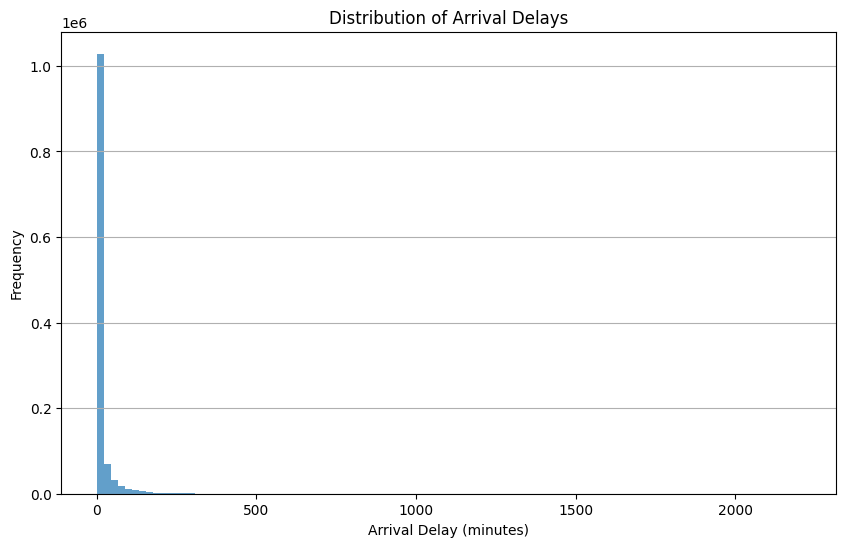

In [47]:
# Distribution of Arrival Delays
plt.figure(figsize=(10, 6))
plt.hist(df['ARR_DELAY'].dropna(), bins=100, alpha=0.7)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

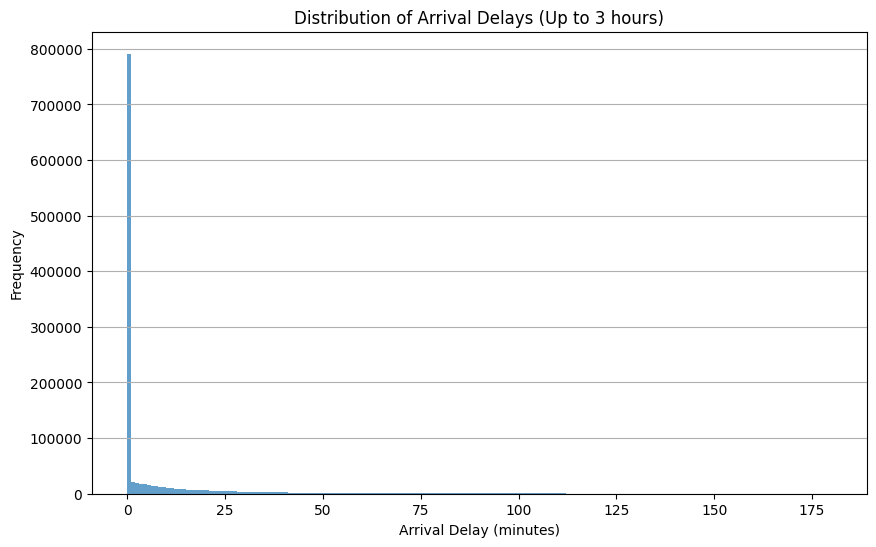

In [48]:
# Distribution of Arrival Delays
plt.figure(figsize=(10, 6))
plt.hist(df['ARR_DELAY'].dropna(), range=[0, 180], bins=180, alpha=0.7)
plt.title('Distribution of Arrival Delays (Up to 3 hours)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

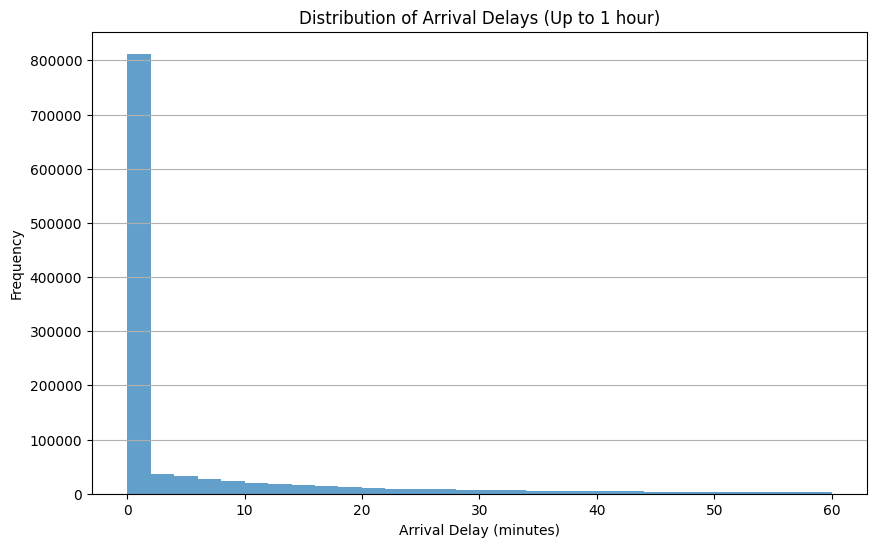

In [49]:
# Distribution of Arrival Delays
plt.figure(figsize=(10, 6))
plt.hist(df['ARR_DELAY'].dropna(), range=[0, 60], bins=30, alpha=0.7)
plt.title('Distribution of Arrival Delays (Up to 1 hour)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

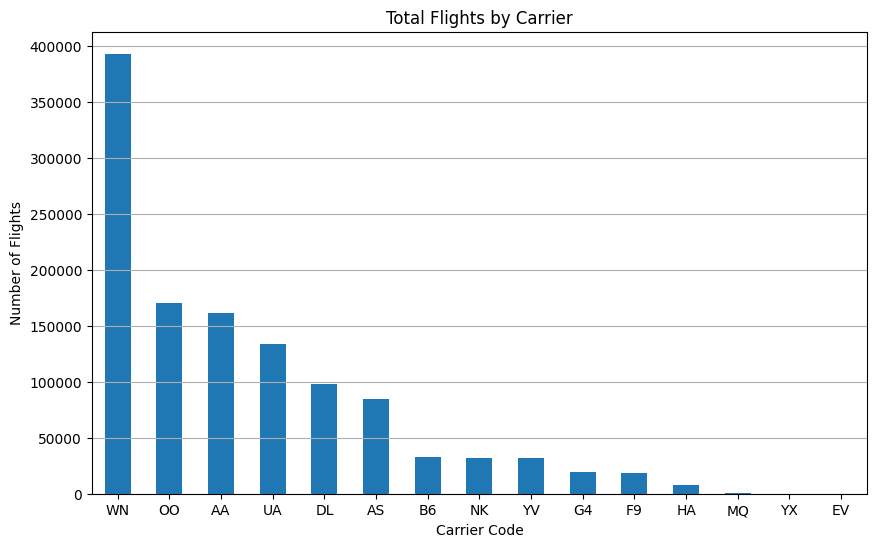

In [50]:
# Total Flights by Carrier
carrier_counts = df['CARRIER_CODE'].value_counts()
plt.figure(figsize=(10, 6))
carrier_counts.plot(kind='bar')
plt.title('Total Flights by Carrier')
plt.xlabel('Carrier Code')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\1289661157.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dep_delay = df.groupby('ORIGIN_ST')['DEP_DELAY'].mean().sort_values()


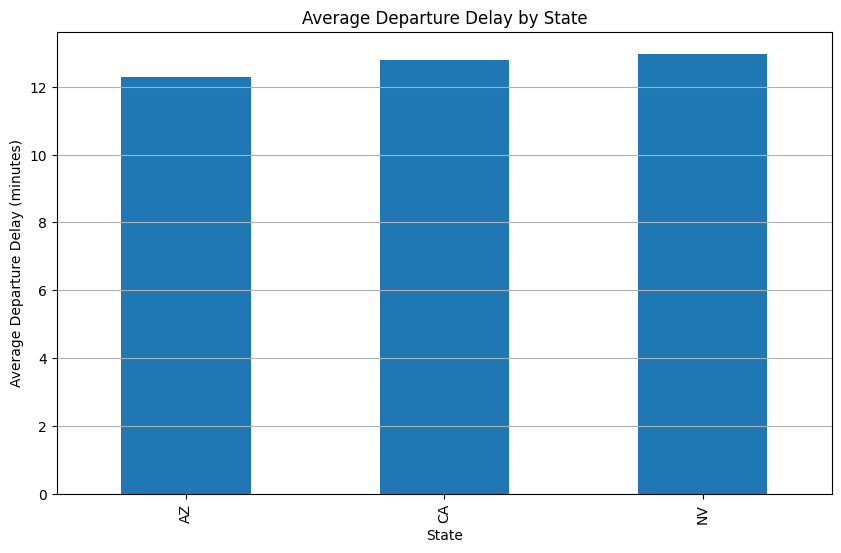

In [51]:
# Average Departure Delay by State
avg_dep_delay = df.groupby('ORIGIN_ST')['DEP_DELAY'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_dep_delay[:3].plot(kind='bar') # Only show the 3 states (AZ, CA, NV)
plt.title('Average Departure Delay by State')
plt.xlabel('State')
plt.ylabel('Average Departure Delay (minutes)')
plt.grid(axis='y')
plt.show()

The dataset contains flight delay information from the Bureau of Transportation Statistics for flights originating from Arizona (AZ), Nevada (NV), and California (CA) in 2019. The primary goal is to analyze air traffic patterns and evaluate airline performance based on flight delays. The dataset contains over 1.18 milloion rows giving us a substantial amount of flight data to work with. The distribution shows a significant number of flights with no delays or very short delays (less than 15 min) but the dataset does contain a few outliers extending to several hours. Some carriers have significantly larger amount of flights in the dataset compared with others. 

The histogram showing the distribution of arrival delays shows us that a majority of flights have minimal delays, with a long right tail.

The bar chart showing total flights by carrier shows us that certain carriers dominate the dataset, with Southwest Airlines (WN) having the highest number of flights.

The departure delay by state shows the average departure delay for flights originating from each state. The average delays are relatively similar across AZ, NV, and CA, indicating consistent performance among these regions.

The dataset provides a comprehensive view of flight delays for specific states in 2019. The statistics and visualizations reveal patterns in air traffic, airport performance, state performance, and airline performance. Understanding these aspects can help understand the underlying cause behind delays. This analysis will help in identifying trends and making informed decisions regarding delays in AZ, NV, and CA.


## Question 3 — (20 points)

1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.
2. For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.
3. For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.




#### 3.1

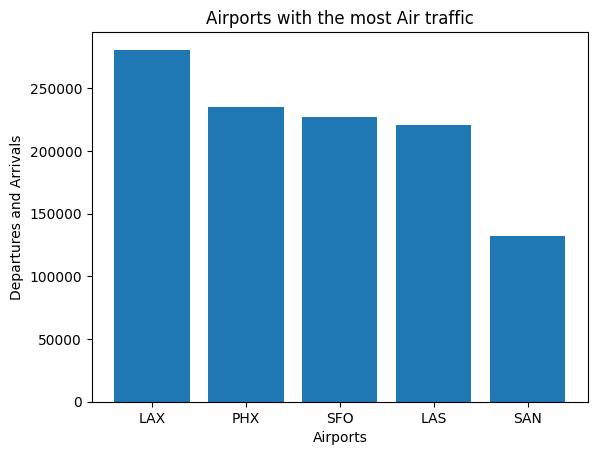

In [52]:
# Get airports with the most departures + arrivals (add the 2)
top_origin_dest = pd.concat([df['ORIGIN'], df['DEST']]).value_counts().head(5)

x_airports = top_origin_dest.index
y_count = top_origin_dest.values

plt.bar(x_airports, y_count)
plt.xlabel('Airports')
plt.ylabel('Departures and Arrivals')
plt.title('Airports with the most Air traffic')
plt.show()

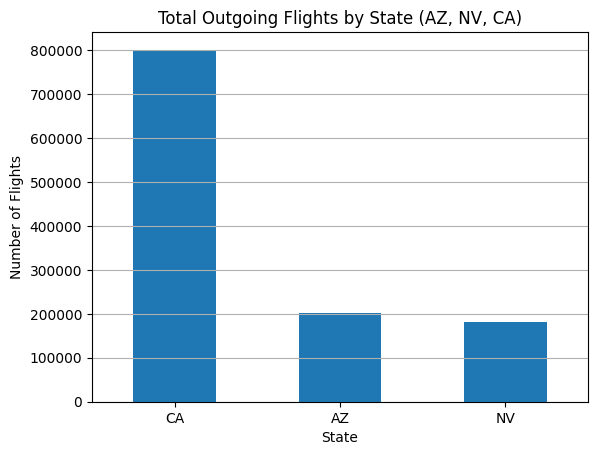

In [53]:
# Total flights by state
total_flights_by_state = df['ORIGIN_ST'].value_counts()[:3]

total_flights_by_state.plot(kind='bar')
plt.title('Total Outgoing Flights by State (AZ, NV, CA)')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


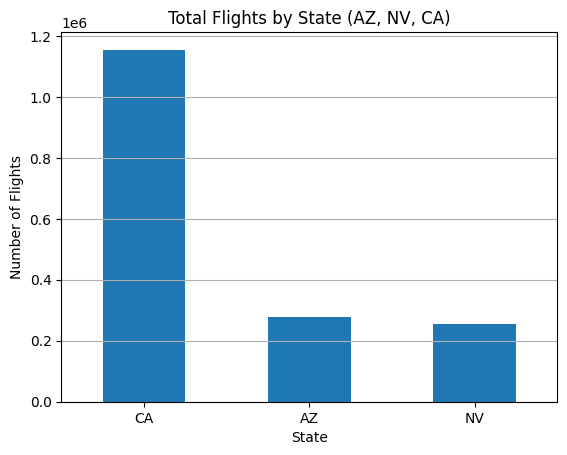

In [54]:
# Total flights by state
total_flights_by_state = pd.concat([df['ORIGIN_ST'], df['DEST_ST']]).value_counts()[:3]

total_flights_by_state.plot(kind='bar')
plt.title('Total Flights by State (AZ, NV, CA)')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The rationale for determining "most air traffic" is based on the frequency of flights since the frequency of flights reflects the volume of passengers traveling and a higher frequency of flights indicates more robust airline operations.

The first bar chart shows the airports with the most departures and arrivals. LAX has the most air traffic. PHX, SFO, and LAS follow after with a very similar amount of traffic. SAN has the 5th most air traffic.

The second and third bar chart shows the states with the most traffic. CA has the highest number of flights by a large margin compared with AZ and NV which follow CA in the chart.

The visualizations show that California is the region with the most air traffic among AZ, NV, and CA, with its high volume of flights and significant airport activity. 

#### 3.2

In [55]:
def top_destinations_by_state(state_code):
    destinations = df[df['ORIGIN_ST'] == state_code]['DEST'].value_counts().head(5)
    return destinations

In [56]:
top_destinations_az = top_destinations_by_state('AZ')
top_destinations_nv = top_destinations_by_state('NV')
top_destinations_ca = top_destinations_by_state('CA')

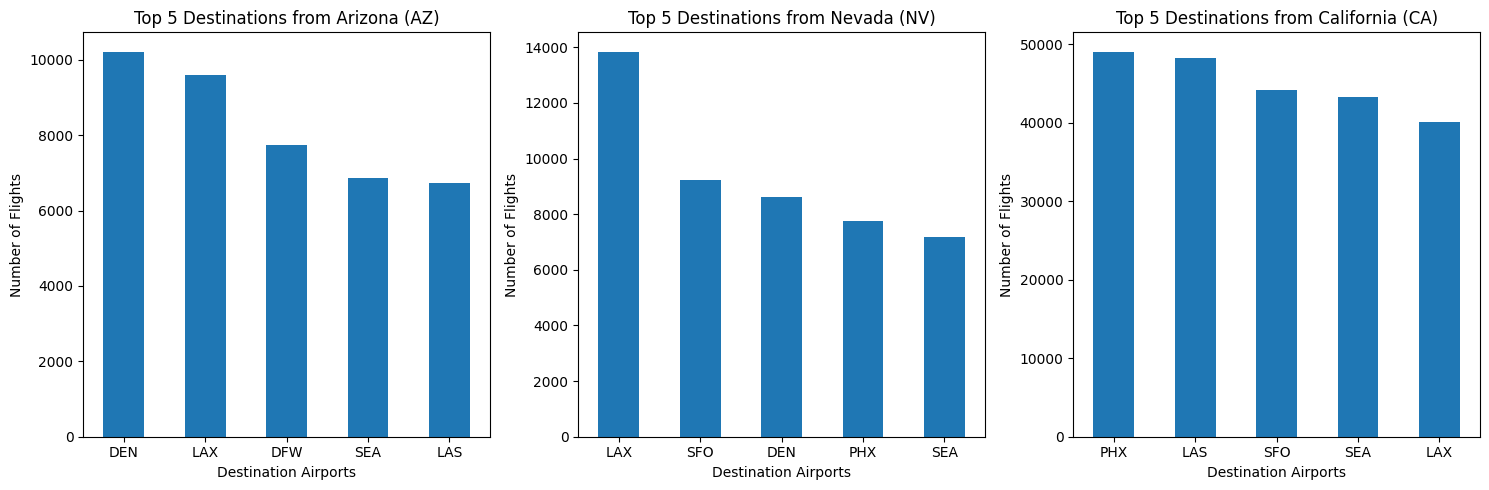

In [57]:
plt.figure(figsize=(15, 5))

# Arizona
plt.subplot(1, 3, 1)
top_destinations_az.plot(kind='bar')
plt.title('Top 5 Destinations from Arizona (AZ)')
plt.xlabel('Destination Airports')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)

# Nevada
plt.subplot(1, 3, 2)
top_destinations_nv.plot(kind='bar')
plt.title('Top 5 Destinations from Nevada (NV)')
plt.xlabel('Destination Airports')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)

# California
plt.subplot(1, 3, 3)
top_destinations_ca.plot(kind='bar')
plt.title('Top 5 Destinations from California (CA)')
plt.xlabel('Destination Airports')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

The top destination from AZ is Denver (DEN) which indicates a strong travel connection between Arizona and Colorado. Los Angeles (LAX) follows reflecting the close proximity and common travel between Arizona and California. Dallas/Fort Worth (DFW) follows LAX suggesting that many travelers from Arizona head to Texas often. Seattle (SEA) and Las Vegas (LAS)follow DFW and both cities are also popular cities for tourism.

The top destination from NV is Los Angeles (LAX) which seems to be a major airport as seen in all 3 graphs. SFO follows which indicates a lot of travel to California from Nevada. Denver, Phoenix, and Seattle follow, showing similar airports to Arizona with Phoenix being a newly introduced airport when comparing the graphs.

California seems to have a significantly larger amount of flights compared to the previous two plot. PHX and LAS lead the graph with the most flights. SFO, SEA, and LAX follow, showing how the importance of travel within California as well as Seattle as a hot spot of travel amongst all the states.


The data highlights strong travel connections between these states, particularly between California and Arizona. The popularity of destinations like LAX and PHX indicates a high volume of travel. Las Vegas consistently appears as a top destination, particularly for travelers from both Arizona and California, making it a major city of tourism. The presence of major cities like Denver and Dallas in the top destinations suggests that maybe a lot of business travel is booming in these cities. The findings reflect geographical proximity, cultural ties, and economic ties among these states.

#### 3.3

In [58]:
def airline_proportions_by_state(state_code):
    total_flights = df[df['ORIGIN_ST'] == state_code].shape[0]
    airline_counts = df[df['ORIGIN_ST'] == state_code]['CARRIER_CODE'].value_counts()
    proportions = (airline_counts / total_flights).sort_values(ascending=False).head(10)
    return proportions

In [59]:
proportions_az = airline_proportions_by_state('AZ')
proportions_nv = airline_proportions_by_state('NV')
proportions_ca = airline_proportions_by_state('CA')

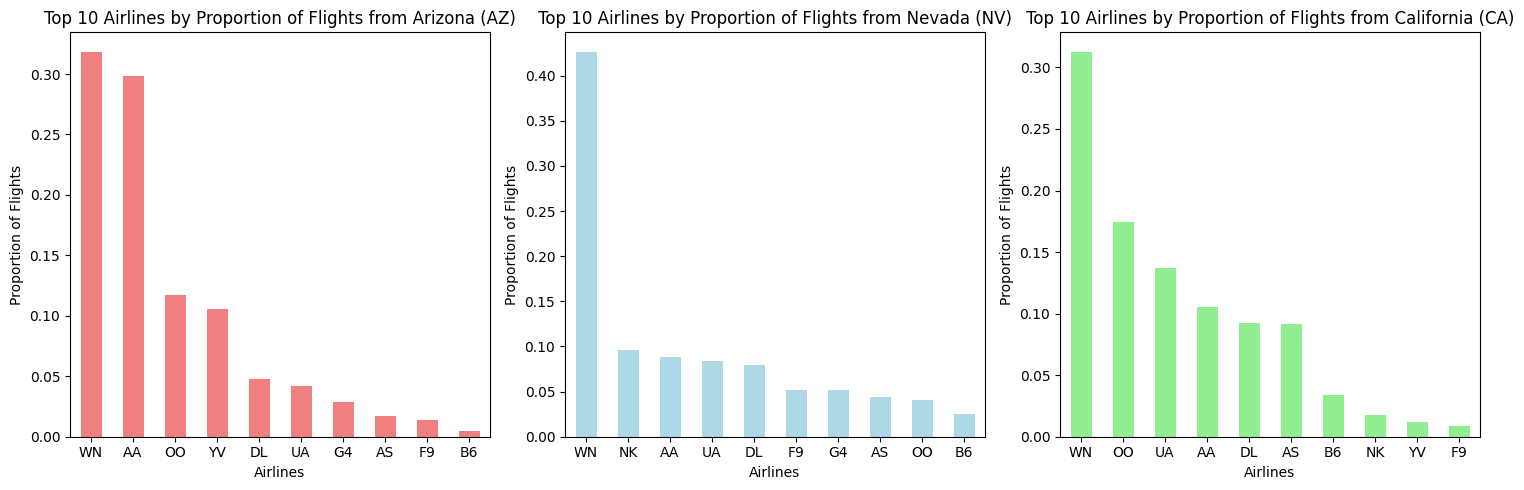

In [60]:
plt.figure(figsize=(15, 5))

# Arizona
plt.subplot(1, 3, 1)
proportions_az.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Airlines by Proportion of Flights from Arizona (AZ)')
plt.xlabel('Airlines')
plt.ylabel('Proportion of Flights')
plt.xticks(rotation=0)

# Nevada
plt.subplot(1, 3, 2)
proportions_nv.plot(kind='bar', color='lightblue')
plt.title('Top 10 Airlines by Proportion of Flights from Nevada (NV)')
plt.xlabel('Airlines')
plt.ylabel('Proportion of Flights')
plt.xticks(rotation=0)

# California
plt.subplot(1, 3, 3)
proportions_ca.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Airlines by Proportion of Flights from California (CA)')
plt.xlabel('Airlines')
plt.ylabel('Proportion of Flights')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

The visualizations illustrate the market share of each airline, highlighting the differences in airline presence across the three states. The dominance of Southwest Airlines (WN) is visible across all the three states. Southwest Airlines consistently holds the largest market share showing that it is the prefered choice for travels in AZ, NV, and CA. Some other airlines like Spirit Airline (NK) show popularity in certain states like NV indicating a special presence in that region. Lot of airlines have very similar proportions showing a competitive landscape. 

## Question 4 — (20 points)

1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
2. Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.



#### 4.1

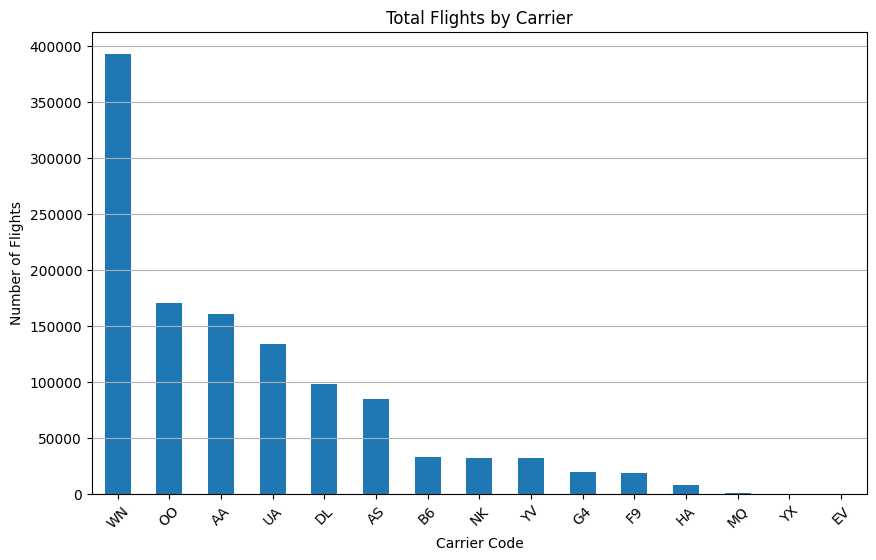

In [61]:
# Count total flights by carrier
carrier_counts = df['CARRIER_CODE'].value_counts()

# Visualization: Total Flights by Carrier
plt.figure(figsize=(10, 6))
carrier_counts.plot(kind='bar')
plt.title('Total Flights by Carrier')
plt.xlabel('Carrier Code')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\1923057770.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_delays = df.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].mean()


<Figure size 1200x600 with 0 Axes>

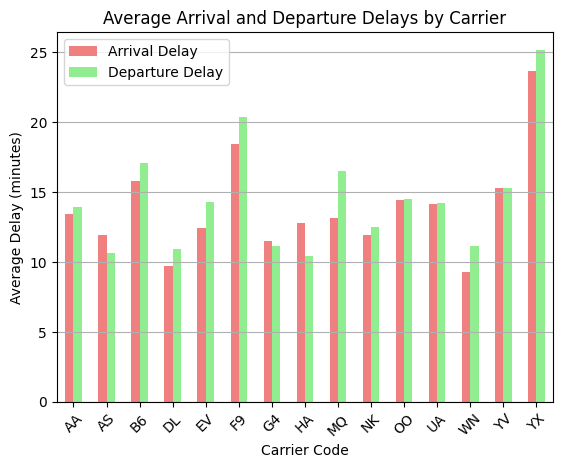

In [62]:
# Calculate average delays by carrier
average_delays = df.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].mean()

# Visualization: Average Arrival and Departure Delays by Carrier
plt.figure(figsize=(12, 6))
average_delays.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Average Arrival and Departure Delays by Carrier')
plt.xlabel('Carrier Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(['Arrival Delay', 'Departure Delay'])
plt.show()

The analysis shows that a few carriers like Southwest Airlines (WN) dominate the market in terms of the number of flights. This suggests that these airlines have established strong networks and customer loyalty. Southwest Airlines has more than double that of the next closest competitor, SkyWest (OO). 

The second chart illustrates the average arrival and departure delays for each carrier. Notably, some carriers, such as Alaska Airlines (AS) and American Airlines (AA), show higher average delays (around 15-20 minutes) compared to others like Southwest Airlines (WN), which has relatively lower delays. While Southwest is the most popular carrier with the most flights they have the lowest average delay while Republic Airline (YX) has one of the lowest number of total flights but has the highest delays in arrival and departure. The differences in average delays among carriers shows the importance of efficiency within the airline. Airlines with lower delays may be more appealing to customers as seen with Southwest Airlines.

#### 4.2

In [63]:
# Calculate min, max, and average delays by carrier
delay_stats = df.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean'])

# Get the top 10 carriers by average arrival delay
top_carriers = delay_stats['ARR_DELAY']['mean'].nlargest(10)

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\3788422839.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_stats = df.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean'])


In [64]:
delay_stats

ARR_DELAY                  DEP_DELAY                 
                   min   max       mean       min   max       mean
CARRIER_CODE                                                      
AA                   0  2041  13.415428         0  2058  13.900384
AS                   0   679  11.894097         0   689  10.632991
B6                   0  1317  15.760621         0  1315  17.107081
DL                   0  1204   9.714802         0  1213   10.91345
EV                   0   158  12.446809         0   164  14.276596
F9                   0   695  18.395578         0   711  20.377027
G4                   0  1495  11.474741         0  1499   11.11057
HA                   0  1421  12.769975         0  1411  10.419211
MQ                   0  1035  13.124719         0  1051  16.491011
NK                   0  1407  11.906533         0  1421  12.483443
OO                   0  1909  14.396733         0  1912   14.48206
UA                   0  1423  14.134955         0  1425   14.20529
WN                   0   579   9.255798         0   576  11.113688
YV                   0  2206  15.289175         0  2209  15.251339
YX                   0   481  23.623377         0   500  25.168831

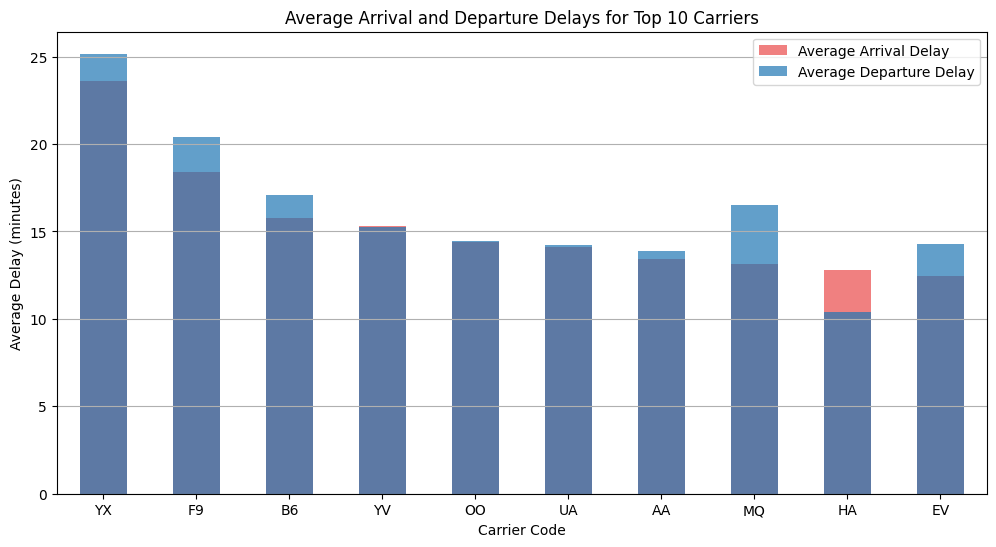

In [65]:
plt.figure(figsize=(12, 6))
top_carriers.plot(kind='bar', color='lightcoral', label='Average Arrival Delay')
delay_stats['DEP_DELAY']['mean'][top_carriers.index].plot(kind='bar', alpha=0.7, label='Average Departure Delay')
plt.title('Average Arrival and Departure Delays for Top 10 Carriers')
plt.xlabel('Carrier Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()
plt.show()

In [66]:
# Filter the data for California
ca_data = df[df['ORIGIN_ST'] == 'CA']

delay_stats_ca = ca_data.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean'])
top_carriers_ca = delay_stats_ca['ARR_DELAY']['mean'].nlargest(10)

delay_stats_ca

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\1904475072.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_stats_ca = ca_data.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean'])


ARR_DELAY                  DEP_DELAY                 
                   min   max       mean       min   max       mean
CARRIER_CODE                                                      
AA                   0  2041  14.247886         0  2058  15.156369
AS                   0   679  11.899929         0   689  10.646113
B6                   0  1140  14.631257         0  1097   15.82031
DL                   0  1204  10.222585         0  1213  11.654815
EV                   0    34   2.266667         0    58   6.533333
F9                   0   695  18.813373         0   711  20.467162
G4                   0  1007  13.618299         0  1016  13.336287
HA                   0  1421  11.934336         0  1411   9.657103
MQ                   0  1035  13.124719         0  1051  16.491011
NK                   0  1407  11.158135         0  1421  11.845196
OO                   0  1909   14.95138         0  1912  15.197348
UA                   0  1337  14.014738         0  1344  14.286342
WN                   0   579   8.882549         0   576  10.495078
YV                   0  2206  14.342927         0  2209  14.676119
YX                   0    71   7.888889         0    64   8.888889

In [67]:
# Filter the data for Arizona
az_data = df[df['ORIGIN_ST'] == 'AZ']

delay_stats_az = az_data.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean'])
top_carriers_az = delay_stats_az['ARR_DELAY']['mean'].nlargest(10)

delay_stats_az

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\1352971621.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_stats_az = az_data.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean'])


ARR_DELAY                  DEP_DELAY                 
                   min   max       mean       min   max       mean
CARRIER_CODE                                                      
AA                   0  1231  11.445648         0  1221  11.428221
AS                   0   666   8.783792         0   665   8.015464
B6                   0  1317   24.18828         0  1315  28.945245
DL                   0   989    7.55311         0  1013   9.014433
EV                   0   158   17.21875         0   164   17.90625
F9                   0   679  11.645458         0   658  13.661273
G4                   0  1495  13.903974         0  1499  13.996418
HA                   0   943  11.659341         0   959   9.563187
MQ                <NA>  <NA>       <NA>      <NA>  <NA>       <NA>
NK                   0  1045   13.03406         0   928  13.867847
OO                   0  1566  10.877004         0  1572  10.321702
UA                   0  1094  14.832449         0  1094  14.705223
WN                   0   481  10.016414         0   504  12.561163
YV                   0  1576  15.895936         0  1558   15.65295
YX                   0   481  25.705882         0   500  27.323529

In [68]:
# Filter the data for Arizona
nv_data = df[df['ORIGIN_ST'] == 'NV']

delay_stats_nv = nv_data.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean'])
top_carriers_nv = delay_stats_nv['ARR_DELAY']['mean'].nlargest(10)

delay_stats_nv

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\4253705322.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_stats_nv = nv_data.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean'])


ARR_DELAY                  DEP_DELAY                 
                   min   max       mean       min   max       mean
CARRIER_CODE                                                      
AA                   0  1910  16.428439         0  1930  16.577076
AS                   0   577  13.190482         0   617  11.649105
B6                   0  1142  20.448971         0  1118  21.949828
DL                   0  1070   8.558231         0  1080   8.392034
EV                <NA>  <NA>       <NA>      <NA>  <NA>       <NA>
F9                   0   493  20.055318         0   522  22.262281
G4                   0   825   8.913588         0   824   8.223043
HA                   0  1118  18.752556         0  1114  15.816973
MQ                <NA>  <NA>       <NA>      <NA>  <NA>       <NA>
NK                   0  1076  12.446299         0  1066  12.926147
OO                   0  1475  15.173718         0  1480  14.265814
UA                   0  1423  14.610138         0  1425    13.3474
WN                   0   440   9.827876         0   458   11.90703
YV                   0  1351  11.900249         0  1374  12.606816
YX                <NA>  <NA>       <NA>      <NA>  <NA>       <NA>

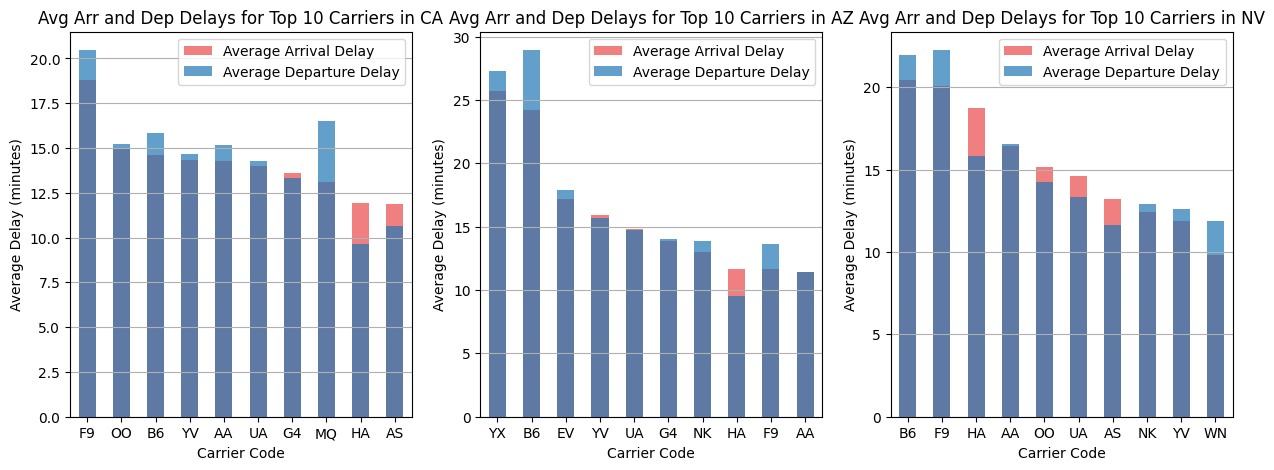

In [69]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
top_carriers_ca.plot(kind='bar', color='lightcoral', label='Average Arrival Delay')
delay_stats_ca['DEP_DELAY']['mean'][top_carriers_ca.index].plot(kind='bar', alpha=0.7, label='Average Departure Delay')
plt.title('Avg Arr and Dep Delays for Top 10 Carriers in CA')
plt.xlabel('Carrier Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()


plt.subplot(1, 3, 2)
top_carriers_az.plot(kind='bar', color='lightcoral', label='Average Arrival Delay')
delay_stats_az['DEP_DELAY']['mean'][top_carriers_az.index].plot(kind='bar', alpha=0.7, label='Average Departure Delay')
plt.title('Avg Arr and Dep Delays for Top 10 Carriers in AZ')
plt.xlabel('Carrier Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()


plt.subplot(1, 3, 3)
top_carriers_nv.plot(kind='bar', color='lightcoral', label='Average Arrival Delay')
delay_stats_nv['DEP_DELAY']['mean'][top_carriers_nv.index].plot(kind='bar', alpha=0.7, label='Average Departure Delay')
plt.title('Avg Arr and Dep Delays for Top 10 Carriers in NV')
plt.xlabel('Carrier Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()



plt.show()

As seen in the graph almost most airlines suffer from longer departure delays than arrival delays. Hawaiian Airlines (HA) seems to have longer average arrival delays in comparison with departure delays in all the 3 states. Republic airlines (YX) seems to have the highest average arrival and departure delays but when looking at each state they seem to only suffer in AZ. Jetblue (B6) seems to suffer with high delays across all 3 states. Frontier Airlines (F9) seems to suffer in multiple states (NV & CA) with vert high average delays. The charts indicate that certain carriers consistently have higher delays across multiple states. The analysis suggests that certain carriers face systemic issues that lead to delays since the delays aren't constrained to a specific region or airport and seem to be visible across multiple states. 

## Question 5 — (30 points)

1. Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines. 
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.


In [70]:
#Write your python code to answer question 5. You can add new cells below as needed.
# Ensure ELAPSED_TIME is numeric (some values might be missing)
df["ELAPSED_TIME"] = pd.to_numeric(df["ELAPSED_TIME"], errors="coerce")

# Convert minutes to hours
df["FLIGHT_HOURS"] = df["ELAPSED_TIME"] / 60
df = df.dropna(subset=["FLIGHT_HOURS"])
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])
df["MONTH"] = df["FL_DATE"].dt.month

# Group by airline and month, summing flight hours
monthly_flight_hours = df.groupby(["CARRIER_CODE", "MONTH"])["FLIGHT_HOURS"].sum().reset_index()
airline_performance = df.groupby("CARRIER_CODE")["FLIGHT_HOURS"].sum().reset_index()

# Get the top 10 airlines with the most total flight hours
top_10_airlines = airline_performance.nlargest(10, "FLIGHT_HOURS")

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\3567888658.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_flight_hours = df.groupby(["CARRIER_CODE", "MONTH"])["FLIGHT_HOURS"].sum().reset_index()
C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\3567888658.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airline_performance = df.groupby("CARRIER_CODE")["FLIGHT_HOURS"].sum().reset_index()


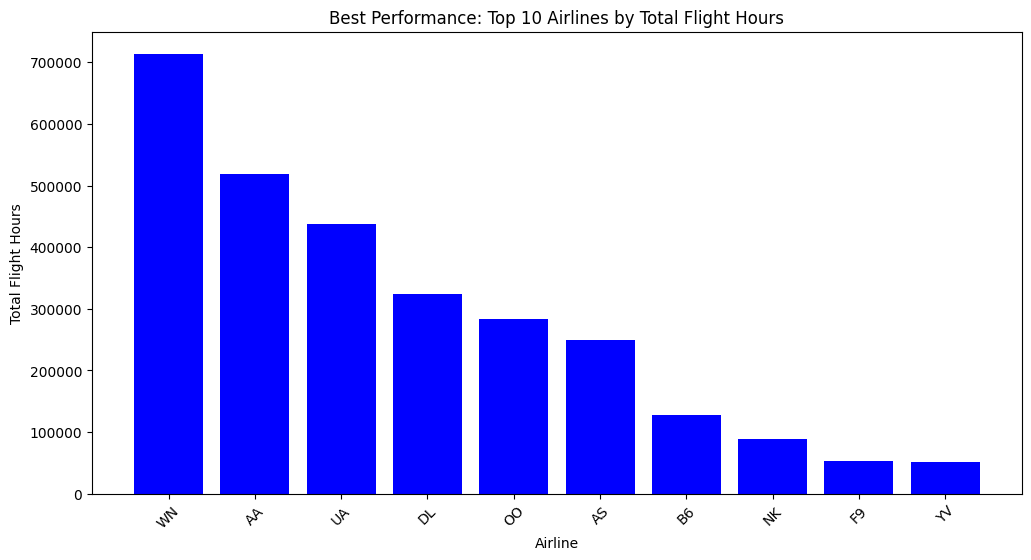

In [71]:
# Part one: find best Performance Airlines
plt.figure(figsize=(12, 6))
plt.bar(top_10_airlines["CARRIER_CODE"], top_10_airlines["FLIGHT_HOURS"], color="blue")

plt.title("Best Performance: Top 10 Airlines by Total Flight Hours")
plt.xlabel("Airline")
plt.ylabel("Total Flight Hours")
plt.xticks(rotation=45)
plt.show()

The following is a bar chart that displays the top 10 airlines with the best performance in terms of total flight hours. The flight hours are calculated from the ELAPSED_TIME data metric with a conversion rate from minutes to hours. The justification for this metric being used is that it indicates which airlines operate the most in the region. This means that this airline is likely the most popular in the region and is likely to be the most reliable if more flights continue to fly out.

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\311350268.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_hours = top_airlines_df.groupby(["CARRIER_CODE", "MONTH"])["FLIGHT_HOURS"].sum().reset_index()


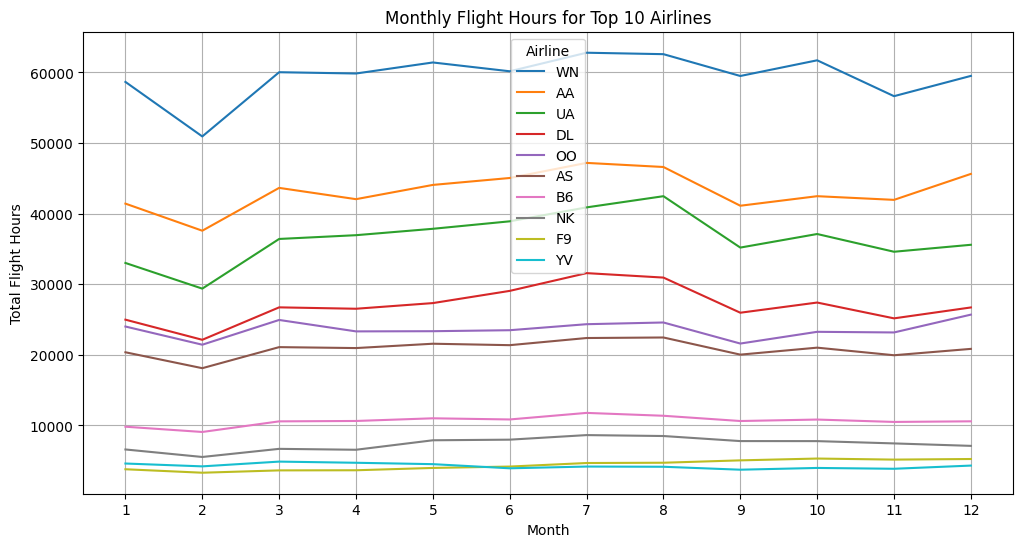

In [72]:
#Part 2: visualize the top airlines in total flight hours per month
top_airlines_df = df[df["CARRIER_CODE"].isin(top_10_airlines["CARRIER_CODE"])]
monthly_hours = top_airlines_df.groupby(["CARRIER_CODE", "MONTH"])["FLIGHT_HOURS"].sum().reset_index()

plt.figure(figsize=(12, 6))
for airline in top_10_airlines["CARRIER_CODE"]:
    subset = monthly_hours[monthly_hours["CARRIER_CODE"] == airline]
    plt.plot(subset["MONTH"], subset["FLIGHT_HOURS"], label=airline)
plt.xlabel("Month")
plt.ylabel("Total Flight Hours")
plt.title("Monthly Flight Hours for Top 10 Airlines")
plt.xticks(range(1, 13))
plt.legend(title="Airline")
plt.grid()
plt.show()

The following is a line chart that shows the total flight hours for each month of the top 10 airlines. Each line represents an airline and this chart tracks the flucuations and genreral changes in flight frequencies throughout the year. This visualization not only helps look at general trends but also sees the perfomrance of each airline to see if they're able to stay consistent or speratic.

## Question 6 — (20 points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

1. Indicate which airline operates the selected aircraft and where it often travels.
2. Arrival and departure delays at the airports where it traveled.
3. Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.

***Note: the TAIL_NUM can help you to identify each unique aircraft.



In [73]:
df['TAIL_NUM'].value_counts()[:1] # top aircraft

TAIL_NUM
N706SK    1392
Name: count, dtype: Int64

In [74]:
N706SK_df = df[df['TAIL_NUM'] == 'N706SK']
N706SK_df # OO

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE,FLIGHT_HOURS,MONTH
879,2019-10-01,OO,N706SK,2957,LAX,CA,FAT,CA,1413,0,1511,0,58,209,0.966667,10
4142,2019-10-01,OO,N706SK,3179,LAX,CA,TUS,AZ,800,0,922,0,82,451,1.366667,10
4143,2019-10-01,OO,N706SK,3179,TUS,AZ,LAX,CA,1007,0,1144,0,97,451,1.616667,10
5505,2019-10-02,OO,N706SK,3024,LAX,CA,SLC,UT,1720,0,1953,0,93,590,1.55,10
5535,2019-10-02,OO,N706SK,3095,LAX,CA,RNO,NV,1238,0,1402,0,84,391,1.4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822136,2019-01-16,OO,N706SK,3024,LAX,CA,SLC,UT,1900,20,2159,28,119,590,1.983333,1
1822160,2019-01-16,OO,N706SK,3095,LAX,CA,RNO,NV,1417,17,1553,20,96,391,1.6,1
1822170,2019-01-16,OO,N706SK,3155,RNO,NV,LAX,CA,1625,21,1832,52,127,391,2.116667,1
1822171,2019-01-16,OO,N706SK,3169,LAX,CA,ASE,CO,818,8,1140,18,142,737,2.366667,1


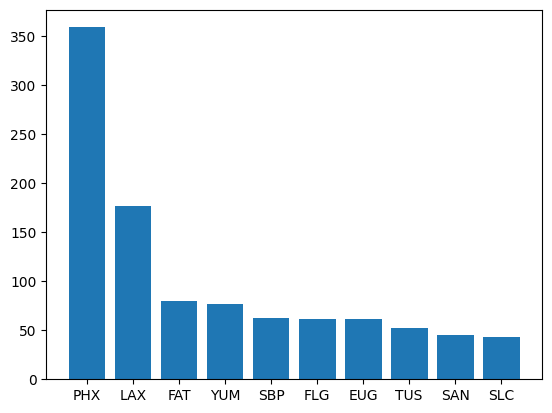

In [75]:
N706SK_top_10_dest = N706SK_df['DEST'].value_counts()[:10]

plt.bar(N706SK_top_10_dest.index, N706SK_top_10_dest.values)
plt.show()

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\1234469992.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  N706SK_delay = N706SK_top_10_dest_df.groupby('DEST')[['ARR_DELAY', 'DEP_DELAY']].agg('mean')


<Axes: xlabel='DEST'>

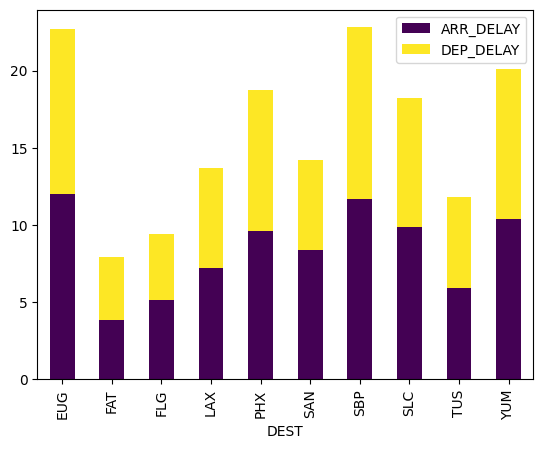

In [76]:
N706SK_top_10_dest_df = N706SK_df[N706SK_df['DEST'].isin(N706SK_top_10_dest.index)]

N706SK_delay = N706SK_top_10_dest_df.groupby('DEST')[['ARR_DELAY', 'DEP_DELAY']].agg('mean')
N706SK_delay = N706SK_delay.dropna() # Drop nan values

N706SK_delay.plot(kind='bar', stacked=True, colormap='viridis')

In [77]:
N706SK_top_10_dest_df['DISTANCE'].describe()

count    1018.000000
mean      320.165029
std       204.062333
min       109.000000
25%       160.000000
50%       209.000000
75%       493.000000
max       952.000000
Name: DISTANCE, dtype: float64

C:\Users\ivina\AppData\Local\Temp\ipykernel_20204\37183640.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  N706SK_distance = N706SK_top_10_dest_df.groupby('DEST')['DISTANCE'].agg(['min', 'max', 'mean'])


<Axes: xlabel='DEST'>

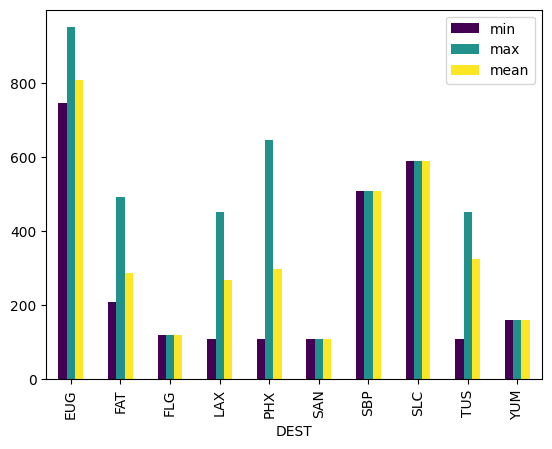

In [78]:
N706SK_distance = N706SK_top_10_dest_df.groupby('DEST')['DISTANCE'].agg(['min', 'max', 'mean'])
N706SK_distance = N706SK_distance.dropna() # Drop nan values

N706SK_distance.plot(kind='bar', colormap='viridis')

In [ ]:
# Distance to delay?

In [ ]:
# 2 more airplanes lol

## Question 7 — Summary

Summarize the overall analysis and share THREE (3) key findings.



In [ ]:
#Write your python code to answer question 7. You can add new cells below as needed.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
